## Analysis

The mean salary is $50,000

Senior Staff is the highest paid title. 

In [ ]:
import pandas as pd

# SQL Alchemy
from sqlalchemy import create_engine
#from config import Password
engine = create_engine(f'postgresql://{username}:{password}/@localhost:5432/{db_name}')
connection = engine.connect()

# MatPlotLib/NumPy/SciPy
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#looking into the sql tables

SELECT ISNULL(myColumn, 0 ) FROM myTable

employees_data = pd.read_sql("SELECT * FROM Employees", connection)
salary_data = pd.read_sql("SELECT * FROM Salaries", connection)
title_data = pd.read_sql("SELECT * FROM Titles", connection)

In [20]:
salary_data
#no null values in the salary data
employees_data.isnull().values.any()
#salary_data["salary"] = salary_data["salary"].fillna(0)

False

In [4]:
title_data

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [18]:
employees_data
#no null values in employees data
employees_data.isnull().values.any()

False

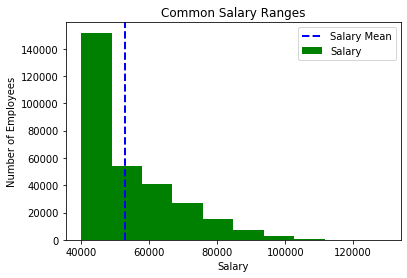

In [6]:
plt.hist(salary_data['salary'], label="Salary", color='green')
plt.axvline(salary_data['salary'].mean(), color='b', linestyle='dashed', linewidth=2, label="Salary Mean")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.legend() 
plt.title("Common Salary Ranges")
plt.savefig("Common Salary Ranges.png")

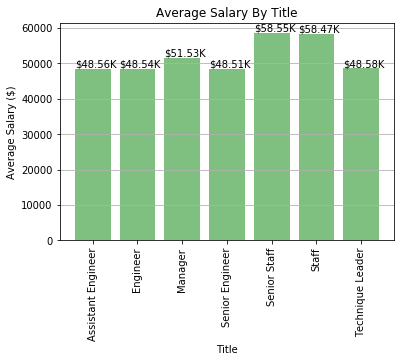

In [8]:
query1 = pd.read_sql("SELECT * FROM Salaries INNER JOIN Employees ON Salaries.emp_no = Employees.emp_no INNER JOIN Titles ON Employees.emp_title_id = Titles.title_id", connection)

avg_salaries_by_title = query1.groupby(["title"]).mean()["salary"]

# Plot the Barchart
#making a list of the different titles to use and the tick marks on the x-axis
title_list = avg_salaries_by_title.index
avg_salary_for_title = avg_salaries_by_title.values

x_axis = np.arange(len(title_list))
tick_locations = [value for value in x_axis]
#rotation 90 used to separate the title names on the graph since they overlapped. 
plt.xticks(tick_locations, title_list, rotation=90)
plt.title("Average Salary By Title")
plt.xlabel("Title")
plt.ylabel("Average Salary ($)")
plt.grid(axis="y")
chart = plt.bar(x_axis, avg_salary_for_title, color="g", alpha=0.5, align="center")
#go through each title and calculate the average salary for each
for i in chart:
    yvalue = i.get_height()
    plt.text(i.get_x(), yvalue + 500, "${:,.2f}K".format(yvalue/1000))
    
plt.show()
